In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patients = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df_0 = patients[patients['DEATH_EVENT'] == 0][['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']]

df_1 = patients[patients['DEATH_EVENT'] == 1][['creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']]

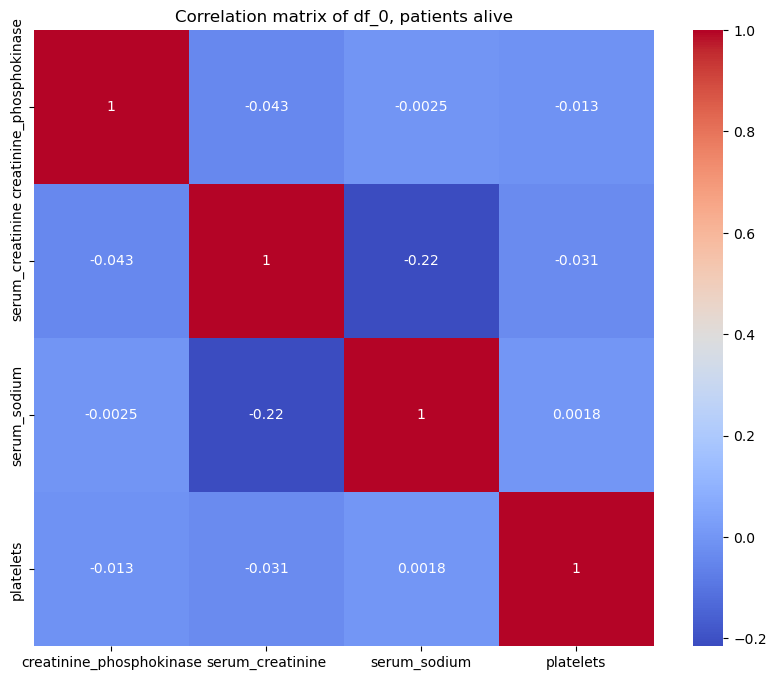

<Figure size 640x480 with 0 Axes>

In [4]:
#Correlation Matrix

m0 = df_0.corr()
plt.figure(figsize=(10,8))
sns.heatmap(m0, annot=True, cmap='coolwarm')

plt.title('Correlation matrix of df_0, patients alive')
plt.show()

plt.savefig('m0.jpg')

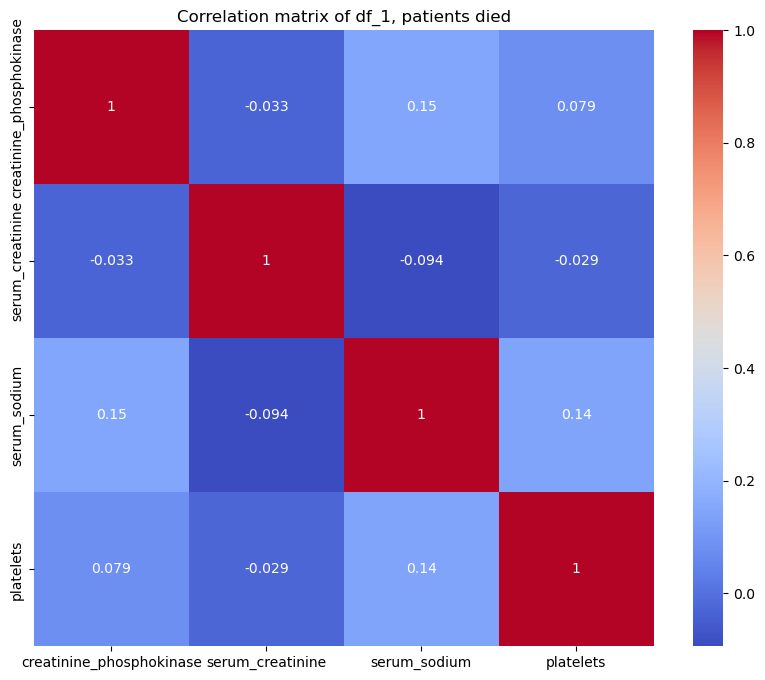

<Figure size 640x480 with 0 Axes>

In [5]:
#Correlation Matrix

m1 = df_1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(m1, annot=True,cmap='coolwarm')

plt.title('Correlation matrix of df_1, patients died')
plt.show()

plt.savefig('m1.jpg')

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def fit_and_evaluate(X_train, X_test, Y_train, Y_test, model, transformation=None):
    if transformation == 'log-log':
        Y_train = np.log(Y_train)
        Y_test_log = np.log(Y_test)

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    if transformation == 'log-log':
        Y_pred = np.exp(Y_pred)
        Y_test = np.exp(Y_test_log)

    residuals = Y_test - Y_pred
    SSE = np.sum(residuals**2)
    return SSE, Y_pred

def analyze_subset(subset, x_feature, y_feature):
    X = subset[[x_feature]].values
    Y = subset[[y_feature]].values
    
    # Ensuring no zero or negative values for log transformation
    valid_indices = (X > 0) & (Y > 0)
    X = X[valid_indices].reshape(-1, 1)  # Reshaping X to be 2D
    Y = Y[valid_indices]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

    # Simple Linear Regression
    lin_reg = LinearRegression()
    SSE, Y_pred = fit_and_evaluate(X_train, X_test, Y_train, Y_test, lin_reg)
    print("Linear Regression SSE:", SSE)

    # Polynomial Regression (Quadratic)
    poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly2 = poly_features_2.fit_transform(X_train)
    X_test_poly2 = poly_features_2.transform(X_test)
    SSE, Y_pred = fit_and_evaluate(X_train_poly2, X_test_poly2, Y_train, Y_test, lin_reg)
    print("Quadratic Regression SSE:", SSE)

    # Polynomial Regression (Cubic)
    poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
    X_train_poly3 = poly_features_3.fit_transform(X_train)
    X_test_poly3 = poly_features_3.transform(X_test)
    SSE, Y_pred = fit_and_evaluate(X_train_poly3, X_test_poly3, Y_train, Y_test, lin_reg)
    print("Cubic Regression SSE:", SSE)

    # GLM: y = a*log(x) + b
    X_train_log = np.log(X_train)
    X_test_log = np.log(X_test)
    SSE, Y_pred = fit_and_evaluate(X_train_log, X_test_log, Y_train, Y_test, lin_reg)
    print("GLM (log-linear) SSE:", SSE)

    # GLM: log(y) = a*log(x) + b (Log-Log)
    SSE, Y_pred = fit_and_evaluate(X_train_log, X_test_log, Y_train, Y_test, lin_reg, transformation='log-log')
    print("GLM (log-log) SSE:", SSE)

# Assuming 'patients' is your DataFrame and is already loaded
# Extracting the subsets for surviving and deceased patients
surviving_patients = patients[patients['DEATH_EVENT'] == 0]
deceased_patients = patients[patients['DEATH_EVENT'] == 1]

# Applying the analysis to each subset
analyze_subset(surviving_patients, 'creatinine_phosphokinase', 'platelets')
analyze_subset(deceased_patients, 'creatinine_phosphokinase', 'platelets')


Linear Regression SSE: 1062012216122.4734
Quadratic Regression SSE: 1077552289006.5336
Cubic Regression SSE: 1099720270641.245
GLM (log-linear) SSE: 1090577997860.4241
GLM (log-log) SSE: 1112836698424.6328
Linear Regression SSE: 387967154665.1771
Quadratic Regression SSE: 386831416885.73804
Cubic Regression SSE: 393235090242.4724
GLM (log-linear) SSE: 394514732600.9402
GLM (log-log) SSE: 423971658753.32776
